In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification;

 99% 1.20G/1.21G [00:13<00:00, 100MB/s] 
100% 1.21G/1.21G [00:13<00:00, 99.5MB/s]


In [ ]:
!unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [ ]:
pip install tqdm

In [ ]:
pip install librosa

In [ ]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import librosa
from scipy.stats import kurtosis
from scipy.stats import skew

def extract_features(y,sr=22050,n_fft=1024,hop_length=512):
    features = {'centroid': librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel(),
                'flux': librosa.onset.onset_strength(y=y, sr=sr).ravel(),
                'rmse': librosa.feature.rms(y=y, frame_length=n_fft, hop_length=hop_length).ravel(),
                'zcr': librosa.feature.zero_crossing_rate(y=y, frame_length=n_fft, hop_length=hop_length).ravel(),
                'contrast': librosa.feature.spectral_contrast(y=y, sr=sr).ravel(),
                'bandwidth': librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel(),
                'flatness': librosa.feature.spectral_flatness(y=y, n_fft=n_fft, hop_length=hop_length).ravel(),
                'rolloff': librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel()}

    # MFCC treatment
    mfcc = librosa.feature.mfcc(y=y, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)
    for idx, v_mfcc in enumerate(mfcc):
        features['mfcc_{}'.format(idx)] = v_mfcc.ravel()

    # Get statistics from the vectors
    def get_feature_stats(features):
        result = {}
        for k, v in features.items():
            result['{}_max'.format(k)] = np.max(v)
            result['{}_min'.format(k)] = np.min(v)
            result['{}_mean'.format(k)] = np.mean(v)
            result['{}_std'.format(k)] = np.std(v)
            result['{}_kurtosis'.format(k)] = kurtosis(v)
            result['{}_skew'.format(k)] = skew(v)
        return result

    dict_agg_features = get_feature_stats(features)
    dict_agg_features['tempo'] = librosa.beat.tempo(y=y,sr=sr,hop_length=hop_length)[0]

    return dict_agg_features

def make_data():
    arr_features=[]
    os.chdir('/content/Data/genres_original')
    genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    for idx,genre in tqdm(enumerate(genres),total=len(genres)):
        for fname in os.listdir(genre):
            y, sr = librosa.load(genre+'/'+fname, duration=30)
            dict_features=extract_features(y=y,sr=sr)
            dict_features['label']=idx
            arr_features.append(dict_features)

    df=pd.DataFrame(data=arr_features)
    print(df.head())
    print(df.shape)
    os.chdir('..')
    os.chdir('..')
    df.to_csv('gtzan_data.csv',index=False)

make_data()

In [13]:
!unzip features_3_sec.csv.zip

Archive:  features_3_sec.csv.zip
  inflating: features_3_sec.csv      


In [25]:
import pandas as pd

data = pd.read_csv('/content/features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [26]:
data.drop('filename', inplace=True, axis=1)
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [27]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [28]:
from sklearn.preprocessing import LabelEncoder

class_list=data.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [29]:
from sklearn.preprocessing import StandardScaler
import numpy as np

fit=StandardScaler()
X=fit.fit_transform(np.array(data.iloc[:,:-1],dtype=float))
X.shape

(9990, 58)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True)

In [31]:
len(y_test)

3497

In [32]:
len(y_train)

6493

In [33]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [35]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               30208     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [36]:
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/200
51/51 [==============================] - 2s 17ms/step - loss: 1.6318 - accuracy: 0.4200 - val_loss: 1.1677 - val_accuracy: 0.5725
Epoch 2/200
51/51 [==============================] - 1s 13ms/step - loss: 1.1404 - accuracy: 0.6056 - val_loss: 0.8828 - val_accuracy: 0.7089
Epoch 3/200
51/51 [==============================] - 1s 14ms/step - loss: 0.9180 - accuracy: 0.6804 - val_loss: 0.7691 - val_accuracy: 0.7403
Epoch 4/200
51/51 [==============================] - 1s 13ms/step - loss: 0.7912 - accuracy: 0.7303 - val_loss: 0.7311 - val_accuracy: 0.7509
Epoch 5/200
51/51 [==============================] - 1s 12ms/step - loss: 0.7114 - accuracy: 0.7571 - val_loss: 0.6284 - val_accuracy: 0.7878
Epoch 6/200
51/51 [==============================] - 1s 18ms/step - loss: 0.6310 - accuracy: 0.7892 - val_loss: 0.5919 - val_accuracy: 0.8055
Epoch 7/200
51/51 [==============================] - 1s 19ms/step - loss: 0.5579 - accuracy: 0.8156 - val_loss: 0.5518 - val_accuracy: 0.8238
Epoch 

In [40]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')

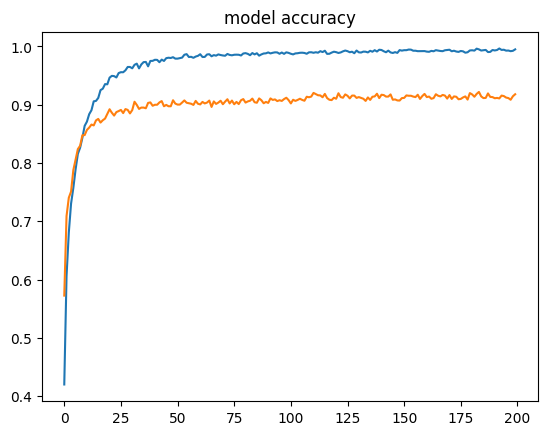

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.show()

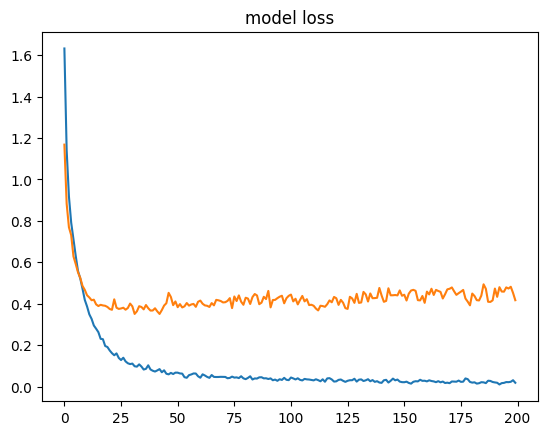

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.show()